import essential libraries:

In [1]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import keras.utils.vis_utils
from importlib import reload
import pydot
reload(keras.utils.vis_utils)
keras.utils.vis_utils.pydot = pydot
from tensorflow.keras.utils import to_categorical

import cifar10:

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

normalize data:

In [3]:
X_train_normal  = X_train_full/255
X_test_normal  = X_test/255

train-test split:

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_normal, y_train_full, test_size=0.2, random_state = 20)

transform dependent variables to one hot:

In [5]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
y_val_onehot = to_categorical(y_val, 10)

set random seed:

In [6]:
np.random.seed(0)
tf.random.set_seed(0)

make call back for early stopping:

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

define functions to compiling data, plotting accuracis and losses, evaluating test data and drawing model architecture:

In [8]:
def model_compile(loss, optimizer, batch_s):
    
    model.compile(loss = loss,
                 optimizer = optimizer,
                 metrics = ['accuracy'])
    
    global model_history
    model_history = model.fit(X_train, y_train_onehot, epochs=500, batch_size = batch_s, validation_data=(X_val, y_val_onehot), callbacks = [callback])

In [9]:
def plot(x):
    
    loss = model_history.history.copy()
    loss.pop('accuracy')
    loss.pop('val_accuracy')
    acc = model_history.history.copy()
    acc.pop('loss')
    acc.pop('val_loss')
    
    pd.DataFrame(loss).plot(figsize=(8,5))
    plt.grid(True)
    plt.show()
    
    pd.DataFrame(acc).plot(figsize=(8,5))
    plt.grid(True)
    plt.ylim(0,1)
    plt.show()

In [10]:
def test_evaluate(x):
    
    test_loss = x.evaluate(X_test_normal, y_test_onehot)[0]
    test_accuracy = x.evaluate(X_test_normal, y_test_onehot)[1]
    y_prob = x.predict(X_test_normal)
    y_pred = y_prob.argmax(axis=-1)
    cnf = confusion_matrix(y_test, y_pred)
    prf = precision_recall_fscore_support(y_test, y_pred, average = 'macro')

    
    print('test loss: ' + str(test_loss) + '\n\ntest accuracy: ' + str(test_accuracy) + '\n\nconfusion matrix: \n' + str(cnf) + '\n\nf1-score: ' + str(prf[2]) + '\n\nrecall: ' + str(prf[1]) + '\n\nprecision: ' + str(prf[0]))

In [11]:
def model_architecture(x):
    return tf.keras.utils.plot_model(
    x,
    show_shapes=True,
    show_dtype=True,
    show_layer_names=False,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)

model with solely convolution layers:

In [1]:
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1,  activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1,  kernel_initializer='he_uniform', activation='relu', padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,  activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1,  activation='relu', padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

NameError: name 'keras' is not defined

Epoch 1/500
1250/1250 [==============================] - 252s 201ms/step - loss: 1.5978 - accuracy: 0.4211 - val_loss: 1.2737 - val_accuracy: 0.5414
Epoch 2/500
1250/1250 [==============================] - 255s 204ms/step - loss: 1.1542 - accuracy: 0.5908 - val_loss: 1.0863 - val_accuracy: 0.6210
Epoch 3/500
1250/1250 [==============================] - 252s 202ms/step - loss: 0.9415 - accuracy: 0.6675 - val_loss: 0.9980 - val_accuracy: 0.6463
Epoch 4/500
1250/1250 [==============================] - 253s 202ms/step - loss: 0.7647 - accuracy: 0.7318 - val_loss: 1.0387 - val_accuracy: 0.6466
Epoch 5/500
1250/1250 [==============================] - 254s 203ms/step - loss: 0.5576 - accuracy: 0.8057 - val_loss: 1.1496 - val_accuracy: 0.6479
Epoch 6/500
1250/1250 [==============================] - 254s 203ms/step - loss: 0.3673 - accuracy: 0.8708 - val_loss: 1.3378 - val_accuracy: 0.6328
Epoch 7/500
1250/1250 [==============================] - 254s 204ms/step - loss: 0.2236 - accuracy: 0.9215

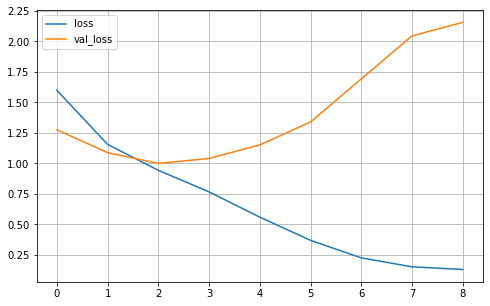

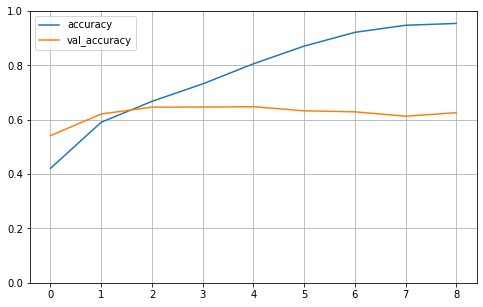

313/313 [==============================] - 11s 36ms/step - loss: 1.1573 - accuracy: 0.6429
test loss: 1.1573235988616943

test accuracy: 0.6428999900817871

confusion matrix: 
[[728  24  47  26  21   6   3  13  98  34]
 [ 41 800   4  13   6   3   3   7  36  87]
 [109  11 467  82 128  63  41  61  29   9]
 [ 41  31  60 464  80 146  50  73  33  22]
 [ 34   3  88  78 594  42  33 100  23   5]
 [ 25  11  45 182  57 535  23  98  19   5]
 [ 19  18  79  99  68  28 635  22  21  11]
 [ 19   3  29  36  73  56   1 753  13  17]
 [127  50   7  13  12   5   1  13 730  42]
 [ 64 109   5  20   7   6   0  23  43 723]]

f1-score: 0.6413638859917244

recall: 0.6428999999999999

precision: 0.6453779023882527


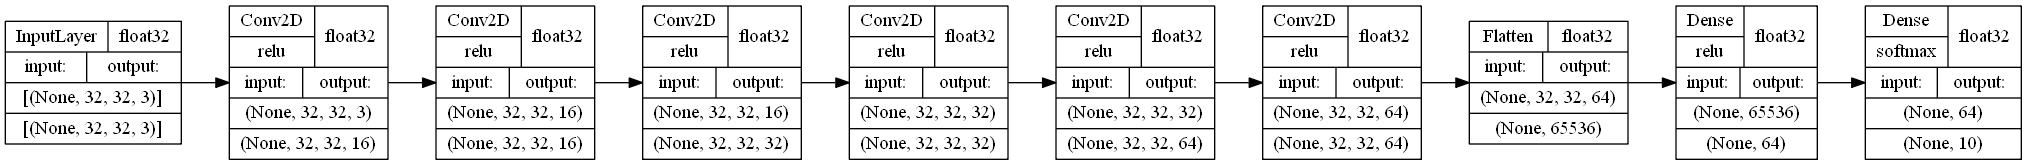

In [13]:
model_compile('categorical_crossentropy', 'adam', 32)
plot(model_history.history)
test_evaluate(model)
model_architecture(model)

**batch normalization:** Batch-Normalization (BN) is an algorithmic method which makes the training of Deep Neural Networks (DNN) faster and more stable. It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch. This normalization step is applied right before (or right after) the nonlinear function.

**pooling:** Pooling layers provide an approach to down sampling feature maps by summarizing the presence of features in patches of the feature map. Two common pooling methods are average pooling and max pooling that summarize the average presence of a feature and the most activated presence of a feature respectively.

implementing model with batch normalization and pooling:

In [14]:
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)       

Epoch 1/500
1250/1250 [==============================] - 74s 58ms/step - loss: 1.3735 - accuracy: 0.5133 - val_loss: 1.2330 - val_accuracy: 0.5631
Epoch 2/500
1250/1250 [==============================] - 82s 66ms/step - loss: 0.9801 - accuracy: 0.6547 - val_loss: 1.2688 - val_accuracy: 0.5974
Epoch 3/500
1250/1250 [==============================] - 92s 73ms/step - loss: 0.8155 - accuracy: 0.7146 - val_loss: 0.9255 - val_accuracy: 0.6802
Epoch 4/500
1250/1250 [==============================] - 80s 64ms/step - loss: 0.7147 - accuracy: 0.7499 - val_loss: 0.8513 - val_accuracy: 0.7009
Epoch 5/500
1250/1250 [==============================] - 81s 65ms/step - loss: 0.6324 - accuracy: 0.7783 - val_loss: 0.7757 - val_accuracy: 0.7328
Epoch 6/500
1250/1250 [==============================] - 82s 66ms/step - loss: 0.5632 - accuracy: 0.8035 - val_loss: 0.9323 - val_accuracy: 0.6996
Epoch 7/500
1250/1250 [==============================] - 83s 66ms/step - loss: 0.4927 - accuracy: 0.8302 - val_loss: 0

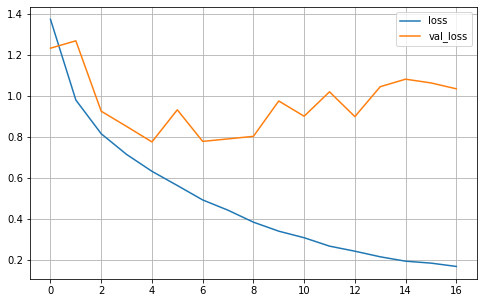

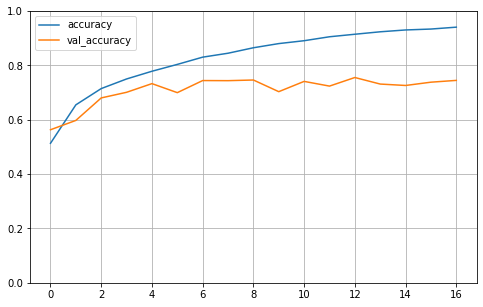

313/313 [==============================] - 4s 13ms/step - loss: 0.9102 - accuracy: 0.7541
test loss: 0.9102030992507935

test accuracy: 0.7541000247001648

confusion matrix: 
[[805  18  20  18  10  17  14  21  43  34]
 [ 15 877   1  17   3   7  13   6  17  44]
 [ 70   4 533  68  97  75  93  45   9   6]
 [ 18   3  30 547  58 210  78  41  11   4]
 [ 20   1  28  67 720  42  55  57   5   5]
 [ 11   1  22 144  40 713  24  42   3   0]
 [  5   2  15  56  26  32 853   6   3   2]
 [  7   0  11  29  37  62  10 831   5   8]
 [ 62  25   6  13   5   6   8   8 841  26]
 [ 23  75   5  14   3  18  12  18  11 821]]

f1-score: 0.7527738682082805

recall: 0.7541

precision: 0.7588957071962327


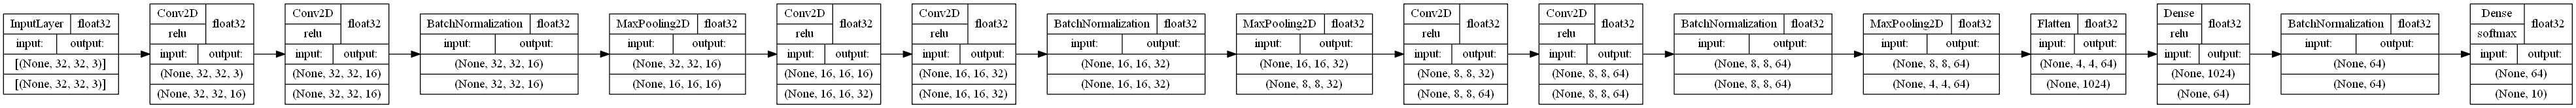

In [15]:
model_compile('categorical_crossentropy', 'adam', 32)
plot(model_history.history)
test_evaluate(model)
model_architecture(model)

using batch normalization will increase our model's accuracy and decrease the loss for both train and validation data. also, using pooling significantly decreae training time by reducing parameters numbers.

adding dropout to model:

In [16]:
model = keras.models.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 32)       

Epoch 1/500
1250/1250 [==============================] - 75s 60ms/step - loss: 1.6013 - accuracy: 0.4311 - val_loss: 1.2272 - val_accuracy: 0.5618
Epoch 2/500
1250/1250 [==============================] - 88s 70ms/step - loss: 1.1936 - accuracy: 0.5779 - val_loss: 1.0286 - val_accuracy: 0.6407
Epoch 3/500
1250/1250 [==============================] - 84s 67ms/step - loss: 1.0203 - accuracy: 0.6412 - val_loss: 0.9326 - val_accuracy: 0.6704
Epoch 4/500
1250/1250 [==============================] - 92s 74ms/step - loss: 0.9146 - accuracy: 0.6796 - val_loss: 0.9153 - val_accuracy: 0.6842
Epoch 5/500
1250/1250 [==============================] - 91s 73ms/step - loss: 0.8403 - accuracy: 0.7075 - val_loss: 0.8048 - val_accuracy: 0.7147
Epoch 6/500
1250/1250 [==============================] - 96s 76ms/step - loss: 0.7901 - accuracy: 0.7281 - val_loss: 0.8881 - val_accuracy: 0.6954
Epoch 7/500
1250/1250 [==============================] - 72s 58ms/step - loss: 0.7466 - accuracy: 0.7420 - val_loss: 0

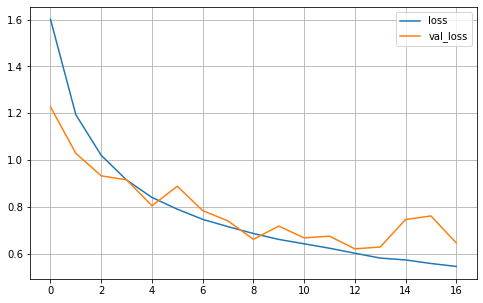

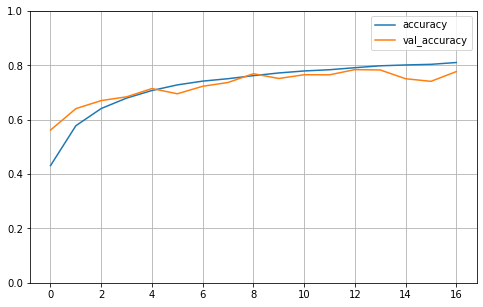

313/313 [==============================] - 4s 14ms/step - loss: 0.6282 - accuracy: 0.7842
test loss: 0.6282299757003784

test accuracy: 0.7842000126838684

confusion matrix: 
[[891   7  24   9   6   0   2  12  33  16]
 [ 31 854   4   3   1   2   5   1  29  70]
 [ 87   4 696  27  57  48  50  24   6   1]
 [ 42   3  90 544  38 175  60  28  13   7]
 [ 39   2  76  43 717  29  40  48   6   0]
 [ 25   2  76  78  31 733  21  29   5   0]
 [  9   1  47  41  22  18 846  11   5   0]
 [ 15   0  37  18  27  60   2 837   1   3]
 [ 80  10   8   9   2   3   2   3 869  14]
 [ 50  43   5   6   4   1   5   7  24 855]]

f1-score: 0.7832141967852961

recall: 0.7842

precision: 0.7874265187529428


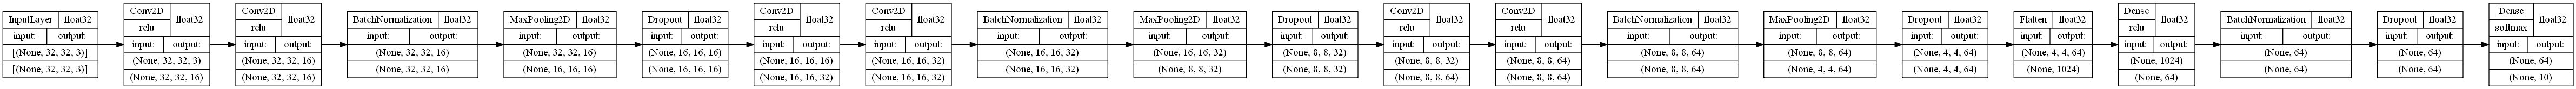

In [17]:
model_compile('categorical_crossentropy', 'adam', 32)
plot(model_history.history)
test_evaluate(model)
model_architecture(model)

using dropout in our model increased the accuracy and decreased the loss value.

The main advantage of dropout method is that it prevents all neurons in a layer from synchronously optimizing their weights. This adaptation, made in random groups, prevents all the neurons from converging to the same goal, thus decorrelating the weights.

A second property discovered for the application of dropout is that the activations of the hidden units become sparse, which is also a desirable characteristic.

A significant challenge when training a machine learning model is deciding how many epochs to run. Too few epochs might not lead to model convergence, while too many epochs could lead to overfitting.
Early stopping is an optimization technique used to reduce overfitting without compromising on model accuracy. The main idea behind early stopping is to stop training before a model starts to overfit.

**parameters of early stop:**

* **monitor:** Quantity to be monitored.
* **min_delta:** Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
* **patience:** Number of epochs with no improvement after which training will be stopped.
* **verbose:** Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.
* **mode:** One of {"auto", "min", "max"}. In min mode, training will stop when the quantity monitored has stopped decreasing; in "max" mode it will stop when the quantity monitored has stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the monitored quantity.
* **baseline:** Baseline value for the monitored quantity. Training will stop if the model doesn't show improvement over the baseline.
* **restore_best_weights:** Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used. An epoch will be restored regardless of the performance relative to the baseline. If no epoch improves on baseline, training will run for patience epochs and restore weights from the best epoch in that set.

we already used early stop callback in our models.